In [1]:
import pandas as pd

#Loading NLTK
import nltk
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords                            
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

#import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Exercici1 

*Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.*

Para este ejercicio he decidido elegir un conjunto de criticas de usuarios y opiniones sobre la película Forgotten (2017). Todas ellas han sido recopiladas y adjuntadas a continuación. 

In [2]:
text="""Netflix has quite some interesting movies/productions and this is one of them. Korean thrillers are quite good most of the time anyway (at least in my book). One may wonder where they come up with that stuff and ideas. But I'm happy they do and I happily watch them too.

Like this one, that keeps you guessing from the start to the finish. Certainly some decisions may feel akward or wrong that characters take, but that is just how things work. Also it will make sense (more or less) in the end. Keep guessing, keep trying to figure out where this goes - it's almost impossible I'd say. Unless you've read a synopsis and even then, it had to be quite thorough ... so I urge go in this without reading too much about it and enjoy the thriller you are being served ... and the enticing story with it ... I don't totally agree with the ending this chooses, but it makes sense with the sensibilities and the mood overall ...

Maybe what you read about the plot is not enough to attract your attention. But as the minutes pass, what seemed to be a drama becomes much more. The plot has twists and we just can't stop watching. I highly recommend it!
I would give this movie an 8 or 9, but since one reviewer here admitted to deliberately giving the movie a 1 instead of 5 or 6 because he wanted to lower the overall review score of the movie, I'm gonna counter that by giving this a 10, because unlike him I agree with most of the other people who reviewed this movie, and feel it deserves praise and a good score.

I'm not going to talk about the plot at all, because this is the kind of movie where the less you know going in, the better. So beware of spoilers in other places! Anyway, it is a great mystery, and a great thriller. It has a few very mild horror moments as well. The music and the ambience sets the mood perfectly. Acting was good. Watch this on an evening with the lights dimmed, and enjoy.

Amazing!

Saw this on netflix. Saw the trailer and immediately watched it. After watching it. Wow. Did not expect this film to be this good. The film is tragic beyond words. It's hard to talk much without spoiling anything. Performances, writing, direction were all great! Definitely a must see!
Just want to say another korean masterpiece Direction,Script,Story Acting all was beyond amazing Twist was just perfect ,explained well at end & ending was soo satisfied but sad for the true Class cinema lovers not for stupid people those few people complaining not good movie these type people truly not have sense about good cinema.
The movie does well to keep you on the edge but could've been much better.
Korean cinema in recent years has been ahead of many other countries on the continent, such as Japan, without giving us much time to assimilate it. "Forgotten" is one of the most recent examples of why this evolution has taken place and why many of us are delighted with this type of cinema. The film focuses on the life of a boy who tries to discover the truth behind the kidnapping of his older brother, who returns as a different man after nineteen days of captivity, from which he claims to remember nothing. A film that mixes the psychological thriller with touches of atmospheric terror and plays excellently with the shadows and paranoia of the younger brother during the days of the disappearance. Jang Hang-jun, responsible for the script and direction, knows how to make us feel the anguish of the situation at all times, making the disinformation that we have as a spectator is the same as our protagonist and creating a situation where interest increases every minute that passes. I must also emphasize the excellent performance of both brothers, especially that of the older brother (Kim Mu-Yeol), because he manages to create an insecurity and concern that does not disappear throughout the film. What's happened to him? That is the question that will haunt us at all time, as the film progresses, because the closer we get to its end, the more disoriented and surprised we will find ourselves, making us goose bumps and hitting us with an unsuspected but tremendous outcome. But not only in the script we can check quality, because if we focus on the more technical sections, we will realize that both the sound and photography sections are really well constructed, being vital in the development of many of the scenes and giving an intensity to the set that is well above average. The mastery of rhythm and the steady pulse behind the camera of the whole team make "Forgotten" not just a thriller, but an example of what modern cinema should be like. With' Forgotten', the lovers of the best thriller are in congratulations and the South Korean country claims its good state of form, because in recent years we have seen many examples of great calibre as 'I Saw The Devil', ' New World' or 'The Wailing' among others. Those who look for a good mystery, disturbing settings and stories with ingenious plot twists, should not miss this film."""

### 1.Tokenization

La tokenización es el primer paso en el análisis de texto. El proceso de dividir un párrafo de texto en fragmentos más pequeños, como palabras o oraciones, se denomina tokenización. El token es una entidad única que es un bloque de construcción para una oración o un párrafo.

#### 1.1. Sentence Tokenization

El tokenizador de oraciones divide el párrafo de texto en oraciones.

In [3]:
tokenized_text=sent_tokenize(text)

print(tokenized_text)

['Netflix has quite some interesting movies/productions and this is one of them.', 'Korean thrillers are quite good most of the time anyway (at least in my book).', 'One may wonder where they come up with that stuff and ideas.', "But I'm happy they do and I happily watch them too.", 'Like this one, that keeps you guessing from the start to the finish.', 'Certainly some decisions may feel akward or wrong that characters take, but that is just how things work.', 'Also it will make sense (more or less) in the end.', "Keep guessing, keep trying to figure out where this goes - it's almost impossible I'd say.", "Unless you've read a synopsis and even then, it had to be quite thorough ... so I urge go in this without reading too much about it and enjoy the thriller you are being served ... and the enticing story with it ...", "I don't totally agree with the ending this chooses, but it makes sense with the sensibilities and the mood overall ...\n\nMaybe what you read about the plot is not enou

Aquí, observamos cómo el texto dado se tokeniza en oraciones.

#### 1.2. Word Tokenization

El tokenizador de palabras divide el párrafo de texto en palabras.

In [4]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Netflix', 'has', 'quite', 'some', 'interesting', 'movies/productions', 'and', 'this', 'is', 'one', 'of', 'them', '.', 'Korean', 'thrillers', 'are', 'quite', 'good', 'most', 'of', 'the', 'time', 'anyway', '(', 'at', 'least', 'in', 'my', 'book', ')', '.', 'One', 'may', 'wonder', 'where', 'they', 'come', 'up', 'with', 'that', 'stuff', 'and', 'ideas', '.', 'But', 'I', "'m", 'happy', 'they', 'do', 'and', 'I', 'happily', 'watch', 'them', 'too', '.', 'Like', 'this', 'one', ',', 'that', 'keeps', 'you', 'guessing', 'from', 'the', 'start', 'to', 'the', 'finish', '.', 'Certainly', 'some', 'decisions', 'may', 'feel', 'akward', 'or', 'wrong', 'that', 'characters', 'take', ',', 'but', 'that', 'is', 'just', 'how', 'things', 'work', '.', 'Also', 'it', 'will', 'make', 'sense', '(', 'more', 'or', 'less', ')', 'in', 'the', 'end', '.', 'Keep', 'guessing', ',', 'keep', 'trying', 'to', 'figure', 'out', 'where', 'this', 'goes', '-', 'it', "'s", 'almost', 'impossible', 'I', "'d", 'say', '.', 'Unless', 'you'

#### 1.3. Frequency Distribution

Con la frecuencia veremos que palabras son las más repetidas.

In [5]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 431 samples and 1004 outcomes>


In [6]:
fdist.most_common(10)

[('the', 59),
 (',', 42),
 ('.', 38),
 ('of', 29),
 ('and', 27),
 ('to', 20),
 ('this', 16),
 ('a', 15),
 ('that', 13),
 ('I', 12)]

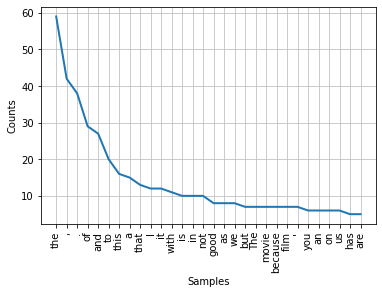

In [7]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

Observamos que el texto contiene varios signos de puntutación que se repiten. Para facilitar el proceso en nuestro análisis eliminaremos aquellos signos que no nos interensen.

A continuación repetimos el proceso:

In [8]:
text = text.lower()
tokenized_word=word_tokenize(text)

tokenized_word = [w for w in tokenized_word if w.isalpha()]

print(tokenized_word)

['netflix', 'has', 'quite', 'some', 'interesting', 'and', 'this', 'is', 'one', 'of', 'them', 'korean', 'thrillers', 'are', 'quite', 'good', 'most', 'of', 'the', 'time', 'anyway', 'at', 'least', 'in', 'my', 'book', 'one', 'may', 'wonder', 'where', 'they', 'come', 'up', 'with', 'that', 'stuff', 'and', 'ideas', 'but', 'i', 'happy', 'they', 'do', 'and', 'i', 'happily', 'watch', 'them', 'too', 'like', 'this', 'one', 'that', 'keeps', 'you', 'guessing', 'from', 'the', 'start', 'to', 'the', 'finish', 'certainly', 'some', 'decisions', 'may', 'feel', 'akward', 'or', 'wrong', 'that', 'characters', 'take', 'but', 'that', 'is', 'just', 'how', 'things', 'work', 'also', 'it', 'will', 'make', 'sense', 'more', 'or', 'less', 'in', 'the', 'end', 'keep', 'guessing', 'keep', 'trying', 'to', 'figure', 'out', 'where', 'this', 'goes', 'it', 'almost', 'impossible', 'i', 'say', 'unless', 'you', 'read', 'a', 'synopsis', 'and', 'even', 'then', 'it', 'had', 'to', 'be', 'quite', 'thorough', 'so', 'i', 'urge', 'go',

In [9]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 381 samples and 874 outcomes>


In [10]:
fdist.most_common(10)

[('the', 66),
 ('of', 29),
 ('and', 27),
 ('to', 20),
 ('this', 16),
 ('a', 16),
 ('that', 14),
 ('it', 14),
 ('with', 12),
 ('i', 12)]

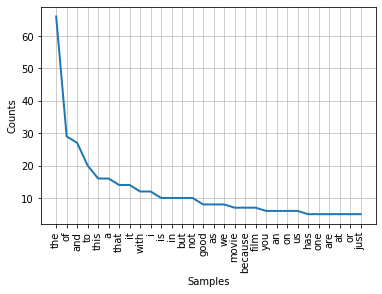

In [11]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

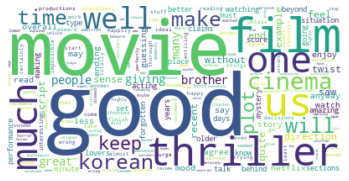

In [12]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the wordcloud object
wordcloud = WordCloud(background_color='white', margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Exercici 2

*Treu les stopwords i realitza stemming al teu conjunt de dades.*

### 1. Stopwords

Los stopwords son palabras vacías consideradas como ruido en el texto. El texto puede contener palabras como: is, am, are, this, a, an, the, etc.

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words=set(stopwords.words("english"))
print(stop_words)

{'just', 'when', "it's", 'myself', 'my', 'from', 'were', 'now', 'i', 'off', 're', 'me', "hasn't", 'being', 'own', 'this', 'yourself', "wouldn't", 'm', 'didn', 'then', 'needn', 'have', "that'll", 'wasn', 'mightn', 'hers', 'doesn', 'few', 'more', "aren't", 'are', 'itself', 'how', 'ma', "you'd", 'what', "don't", "mightn't", 'did', 'up', 'been', 'in', 'out', 'such', 'until', 'during', 'there', 'of', "needn't", 'to', 'she', 'ourselves', 'her', 'some', 'too', 'do', 'each', 'again', "she's", 'don', 'does', 'that', 'or', 'those', 'over', "should've", 'shouldn', 'nor', 'theirs', 'while', 'at', "didn't", 'has', 'y', 'o', "you'll", 'so', 'won', 'hasn', 'above', 'ours', 'why', 'as', 'their', 'you', "couldn't", 'here', "haven't", 'themselves', 'should', "isn't", 'be', 'below', 'him', 'and', 've', 'couldn', 'very', 'a', 'we', 'your', 'shan', 'they', 'it', 'mustn', 'yours', 'same', 'than', 'am', 'other', 'herself', 'will', 'through', 'these', 'into', 'yourselves', 'who', 'against', 'by', 'the', 'only

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 1.1. Removing Stopwords

Creamos una lista de palabras vacías y filtramos para eliminar los *stopwords* del texto.

In [14]:
filtered_sent=[]

for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
        
print("Tokenized Sentence:",tokenized_word)
print("\nFilterd Sentence:",filtered_sent)

print(f"\nEn total se han eliminado {len(tokenized_word)-len(filtered_sent)} palabras.")

Tokenized Sentence: ['netflix', 'has', 'quite', 'some', 'interesting', 'and', 'this', 'is', 'one', 'of', 'them', 'korean', 'thrillers', 'are', 'quite', 'good', 'most', 'of', 'the', 'time', 'anyway', 'at', 'least', 'in', 'my', 'book', 'one', 'may', 'wonder', 'where', 'they', 'come', 'up', 'with', 'that', 'stuff', 'and', 'ideas', 'but', 'i', 'happy', 'they', 'do', 'and', 'i', 'happily', 'watch', 'them', 'too', 'like', 'this', 'one', 'that', 'keeps', 'you', 'guessing', 'from', 'the', 'start', 'to', 'the', 'finish', 'certainly', 'some', 'decisions', 'may', 'feel', 'akward', 'or', 'wrong', 'that', 'characters', 'take', 'but', 'that', 'is', 'just', 'how', 'things', 'work', 'also', 'it', 'will', 'make', 'sense', 'more', 'or', 'less', 'in', 'the', 'end', 'keep', 'guessing', 'keep', 'trying', 'to', 'figure', 'out', 'where', 'this', 'goes', 'it', 'almost', 'impossible', 'i', 'say', 'unless', 'you', 'read', 'a', 'synopsis', 'and', 'even', 'then', 'it', 'had', 'to', 'be', 'quite', 'thorough', 'so'

### 2. Lexicon Normalization

La normalización del léxico considera otro tipo de ruido en el texto. Por ejemplo, conexión, conectado, palabra de conexión se reduce a una palabra común "conectar". Reduce las formas derivadas de una palabra a una raíz común.

#### 2.1. Stemming

*Stemming* es un proceso de normalización lingüística, que reduce las palabras a su palabra raíz o elimina los afijos derivativos. Por ejemplo, conexión, conectado, palabra de conexión se reduce a una palabra común "conectar".

In [15]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("\nStemmed Sentence:",stemmed_words)

Filtered Sentence: ['netflix', 'quite', 'interesting', 'one', 'korean', 'thrillers', 'quite', 'good', 'time', 'anyway', 'least', 'book', 'one', 'may', 'wonder', 'come', 'stuff', 'ideas', 'happy', 'happily', 'watch', 'like', 'one', 'keeps', 'guessing', 'start', 'finish', 'certainly', 'decisions', 'may', 'feel', 'akward', 'wrong', 'characters', 'take', 'things', 'work', 'also', 'make', 'sense', 'less', 'end', 'keep', 'guessing', 'keep', 'trying', 'figure', 'goes', 'almost', 'impossible', 'say', 'unless', 'read', 'synopsis', 'even', 'quite', 'thorough', 'urge', 'go', 'without', 'reading', 'much', 'enjoy', 'thriller', 'served', 'enticing', 'story', 'totally', 'agree', 'ending', 'chooses', 'makes', 'sense', 'sensibilities', 'mood', 'overall', 'maybe', 'read', 'plot', 'enough', 'attract', 'attention', 'minutes', 'pass', 'seemed', 'drama', 'becomes', 'much', 'plot', 'twists', 'ca', 'stop', 'watching', 'highly', 'recommend', 'would', 'give', 'movie', 'since', 'one', 'reviewer', 'admitted', 'de

## Exercici 3

*Realitza sentiment analysis al teu conjunt de dades.*

### 1. Sentiment Analysis

Existen principalmente dos enfoques para realizar el análisis de sentimiento:

* **Basado en el léxico**: se cuentan el número de palabras positivas y negativas de un texto y el recuento más grande será el sentimiento del texto.

* **Enfoque basado en machine learning**: Desarrollaremos un modelo de clasificación entrenado utilizando el conjunto de datos previamente agrupado (positivo, negativo y neutral).

#### 1.1. Sentiment Analysis: Lexicon-based

El objetivo es clasificar la opinión expresada en el texto en diferentes categorías, como positivo, negativo o neutral, para ello analizaremos el número de palabras positivas y negativas dadas en el texto y el recuento más grande será el sentimiento del texto.

In [16]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sentiment_text = sid.polarity_scores(text)
    
print("Overall sentiment is: ", sentiment_text)
print("\nText was rated as:", sentiment_text['neg']*100, "% Negative")
print("Text was rated as:", sentiment_text['neu']*100, "% Neutral")
print("Text was rated as:", sentiment_text['pos']*100, "% Positive\n")
        
# decide sentiment as positive, negative and neutral
def sentiment(sentiment_text):
    if sentiment_text >= 0.05 :
        return 'Positivo'

    elif sentiment_text <= - 0.05 :
        return 'Negativo'

    else:
        return 'Neutral'

print("El texto fue calificado como",sentiment(sentiment_text['compound']),"con una puntuación de:", sentiment_text['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Overall sentiment is:  {'neg': 0.056, 'neu': 0.709, 'pos': 0.235, 'compound': 0.9996}

Text was rated as: 5.6000000000000005 % Negative
Text was rated as: 70.89999999999999 % Neutral
Text was rated as: 23.5 % Positive

El texto fue calificado como Positivo con una puntuación de: 0.9996


#### 1.2. Sentiment Analysis: Machine learning based approach

#### 1.2.1. Loading Data

A continuación analizaremos las oraciones del texto de forma individual. Para ello se ha creado un dataframe donde hemos agrupado y evaluado el conjunto de oraciones.

In [17]:
df = pd.DataFrame(tokenized_text, columns=['Phrase'])
df.head()

,Phrase
0,Netflix has quite some interesting movies/prod...
1,Korean thrillers are quite good most of the ti...
2,One may wonder where they come up with that st...
3,But I'm happy they do and I happily watch them...
4,"Like this one, that keeps you guessing from th..."


In [18]:
df['scores'] = df['Phrase'].apply(lambda text: sid.polarity_scores(text))

df.head()

,Phrase,scores
0,Netflix has quite some interesting movies/prod...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp..."
1,Korean thrillers are quite good most of the ti...,"{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp..."
2,One may wonder where they come up with that st...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,But I'm happy they do and I happily watch them...,"{'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'comp..."
4,"Like this one, that keeps you guessing from th...","{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp..."


In [19]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,Phrase,scores,compound
0,Netflix has quite some interesting movies/prod...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.4549
1,Korean thrillers are quite good most of the ti...,"{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...",0.5095
2,One may wonder where they come up with that st...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,But I'm happy they do and I happily watch them...,"{'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'comp...",0.8990
4,"Like this one, that keeps you guessing from th...","{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.3612


In [20]:
df['Sentiment'] = df['compound'].apply(sentiment)

df.head()

,Phrase,scores,compound,Sentiment
0,Netflix has quite some interesting movies/prod...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.4549,Positivo
1,Korean thrillers are quite good most of the ti...,"{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...",0.5095,Positivo
2,One may wonder where they come up with that st...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,But I'm happy they do and I happily watch them...,"{'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'comp...",0.8990,Positivo
4,"Like this one, that keeps you guessing from th...","{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.3612,Positivo


In [21]:
df.Sentiment.value_counts()

Positivo    28
Neutral     10
Negativo     7
Name: Sentiment, dtype: int64

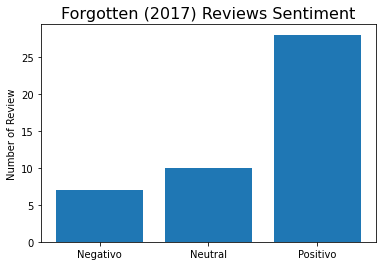

In [22]:
Sentiment_count=df.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.title('Forgotten (2017) Reviews Sentiment', fontsize = 16)
#plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

#### 1.2.2. Model

#### 1.2.2.1. Bag-of-words model (BoW )

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['Phrase'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Sentiment'], test_size=0.3, random_state=1)

In [25]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
pred_bow= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, pred_bow))

MultinomialNB Accuracy: 0.5714285714285714


#### 1.2.2.2. TF-IDF (Term Frequency-Inverse Document Frequency)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['Phrase'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df['Sentiment'], test_size=0.3, random_state=123)

In [28]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
pred_tf= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, pred_tf))

MultinomialNB Accuracy: 0.6428571428571429


#### 1.2.3. Conclusión

Comparando ambos resultados obtenemos un 57% para CountVector o BoW y de un 64% para TF-IDF. Estos resultados no los consideraremos de gran precisión por lo que deberan ser mejorados.